In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs


In [17]:
import numpy as np

# Customer segments
segs = [    [20, 30, 40, 50, 60, 70, 80],
    ['Male', 'Female'],
    [50000, 60000, 70000, 80000, 90000, 100000],
    ['Associate\'s', 'Bachelor\'s', 'Master\'s', 'Doctorate'],
    ['New York', 'San Francisco', 'Los Angeles', 'Chicago', 'Seattle'],
    [2, 3, 4, 5, 6, 7, 8],
    [3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000],
    ['Electronics', 'Clothing', 'Home Goods', 'Beauty', 'Groceries'],
    ['Low', 'Medium', 'High'],
    ['Low', 'Medium', 'High', 'Very High'],
    ['Active', 'Passive'],
]

# Number of rows to generate
num_rows = 1000

# Probabilities for each segment
probs = [    [0.1, 0.2, 0.3, 0.1, 0.1, 0.1, 0.1],
    [0.5, 0.5],
    [0.2, 0.2, 0.2, 0.1, 0.1, 0.2],
    [0.1, 0.3, 0.3, 0.3],
    [0.2, 0.2, 0.2, 0.2, 0.2],
    [0.1, 0.1, 0.1, 0.3, 0.3, 0.1, 0.1],
    [0.1, 0.1, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1],
    [0.2, 0.2, 0.2, 0.2, 0.2],
    [0.4, 0.3, 0.3],
    [0.2, 0.3, 0.3, 0.2],
    [0.5, 0.5]
]

# Normalize probabilities for each segment
probs = [[prob/sum(prob_list) for prob in prob_list] for prob_list in probs]



# Generate indices for each segment based on probabilities
indices = [np.random.choice(len(seg), num_rows, p=prob) for seg, prob in zip(segs, probs)]

# Generate data
data = []
for i in range(num_rows):
    data.append([i + 1] + [segs[j][indices[j][i]] for j in range(len(segs))])


In [18]:
data[:3]

[[1,
  50,
  'Female',
  80000,
  "Associate's",
  'Seattle',
  4,
  10000,
  'Home Goods',
  'Low',
  'Low',
  'Passive'],
 [2,
  40,
  'Male',
  70000,
  "Bachelor's",
  'Seattle',
  6,
  4000,
  'Groceries',
  'Medium',
  'High',
  'Active'],
 [3,
  50,
  'Female',
  100000,
  'Doctorate',
  'New York',
  5,
  6000,
  'Clothing',
  'High',
  'Medium',
  'Active']]

In [19]:
dataframe = pd.DataFrame(data) 

dataframe.columns =['id', 'age', 'gender', 'income', 'education', 'location', 'purchase_frequency', 'amount_spent', 'product_type', 
              'customer_satisfaction', 'loyalty', 'social_media_activity']

dataframe

,id,age,gender,income,education,location,purchase_frequency,amount_spent,product_type,customer_satisfaction,loyalty,social_media_activity
0,1,50,Female,80000,Associate's,Seattle,4,10000,Home Goods,Low,Low,Passive
1,2,40,Male,70000,Bachelor's,Seattle,6,4000,Groceries,Medium,High,Active
2,3,50,Female,100000,Doctorate,New York,5,6000,Clothing,High,Medium,Active
3,4,80,Male,100000,Master's,New York,5,7000,Electronics,Medium,Very High,Passive
4,5,70,Male,100000,Master's,Seattle,3,7000,Groceries,High,Low,Passive
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,40,Female,70000,Doctorate,Seattle,7,6000,Home Goods,Medium,High,Passive
996,997,60,Male,70000,Master's,Chicago,2,5000,Electronics,Low,Very High,Active
997,998,50,Female,50000,Bachelor's,San Francisco,5,4000,Clothing,Medium,Low,Passive
998,999,70,Male,100000,Master's,Seattle,5,7000,Electronics,Medium,Low,Active


In [20]:
# Create instance 
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the data
one_hot = encoder.fit_transform(dataframe)

# The resulting one-hot encoding will be a sparse matrix

print(one_hot.toarray())

[[1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [21]:
# Separate numerical and categorical values
numerical_values = dataframe.select_dtypes(include=[np.number]).values
categorical_values = dataframe.select_dtypes(include=['object']).values

print("numerical values", "\n", numerical_values, "\n")
print("categorical values", "\n", categorical_values, "\n")

# One-hot encode categorical values
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(categorical_values).toarray()

print("one_hot_encoded", "\n", one_hot_encoded, "\n")

# Combine numerical and one-hot encoded categorical values
encoded = np.concatenate((numerical_values, one_hot_encoded), axis=1)

print("encoded", "\n", encoded, "\n")

numerical values 
 [[     1     50  80000      4  10000]
 [     2     40  70000      6   4000]
 [     3     50 100000      5   6000]
 ...
 [   998     50  50000      5   4000]
 [   999     70 100000      5   7000]
 [  1000     30  50000      6   5000]] 

categorical values 
 [['Female' "Associate's" 'Seattle' ... 'Low' 'Low' 'Passive']
 ['Male' "Bachelor's" 'Seattle' ... 'Medium' 'High' 'Active']
 ['Female' 'Doctorate' 'New York' ... 'High' 'Medium' 'Active']
 ...
 ['Female' "Bachelor's" 'San Francisco' ... 'Medium' 'Low' 'Passive']
 ['Male' "Master's" 'Seattle' ... 'Medium' 'Low' 'Active']
 ['Male' "Master's" 'Chicago' ... 'Low' 'Medium' 'Active']] 

one_hot_encoded 
 [[1. 0. 1. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]] 

encoded 
 [[1.00e+00 5.00e+01 8.00e+04 ... 0.00e+00 0.00e+00 1.00e+00]
 [2.00e+00 4.00e+01 7.00e+04 ... 0.00e+00 1.00e+00 0.00e+00]
 [3.00e+00 5.00e+01 1.00e+05 ...

In [22]:
dataframe = pd.DataFrame(encoded) 


[[-1.73031962  0.19076804  0.42398178 ... -0.53881591 -0.99203175
   0.99203175]
 [-1.72685552 -0.36379021 -0.14283878 ... -0.53881591  1.00803226
  -1.00803226]
 [-1.72339142  0.19076804  1.55762291 ... -0.53881591  1.00803226
  -1.00803226]
 ...
 [ 1.72339142  0.19076804 -1.27647991 ... -0.53881591 -0.99203175
   0.99203175]
 [ 1.72685552  1.29988453  1.55762291 ... -0.53881591  1.00803226
  -1.00803226]
 [ 1.73031962 -0.91834846 -1.27647991 ... -0.53881591  1.00803226
  -1.00803226]]
                 0          1             2         3            4    5    6   \
cluster                                                                         
0        478.292035  48.849558  72345.132743  5.212389  6433.628319  0.0  1.0   
1        489.817427  45.643154  72572.614108  5.286307  6460.580913  1.0  0.0   
2        512.091255  46.273764  71520.912548  5.193916  6190.114068  0.0  1.0   
3        517.333333  45.740741  73592.592593  5.070370  6388.888889  1.0  0.0   

               7     

C:\Users\Verneri\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


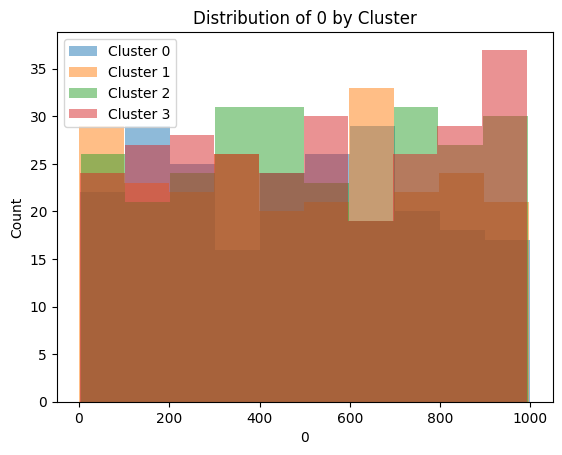

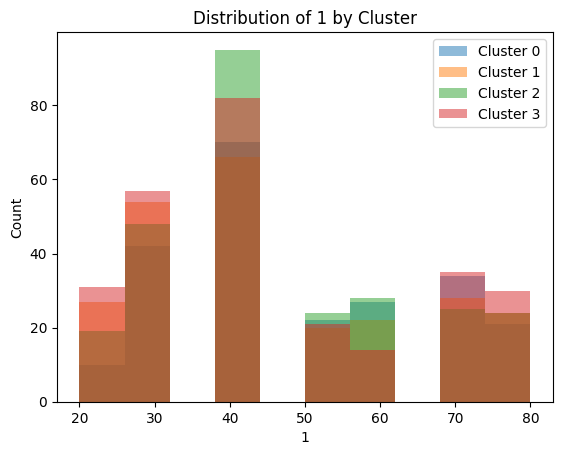

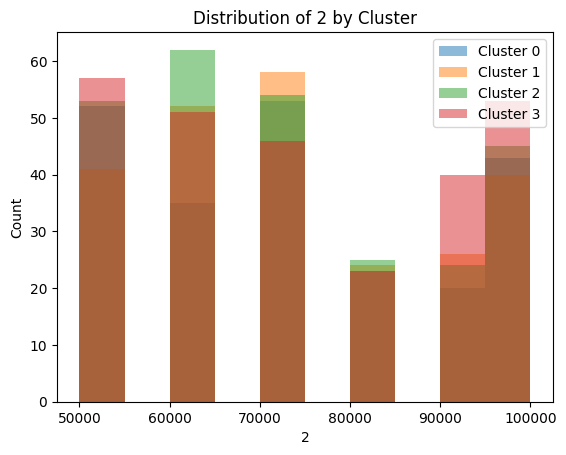

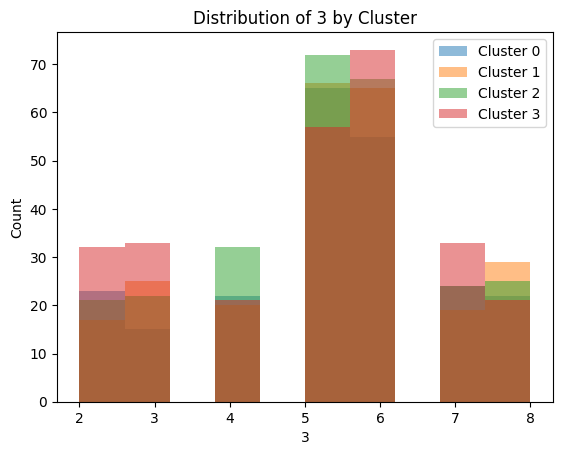

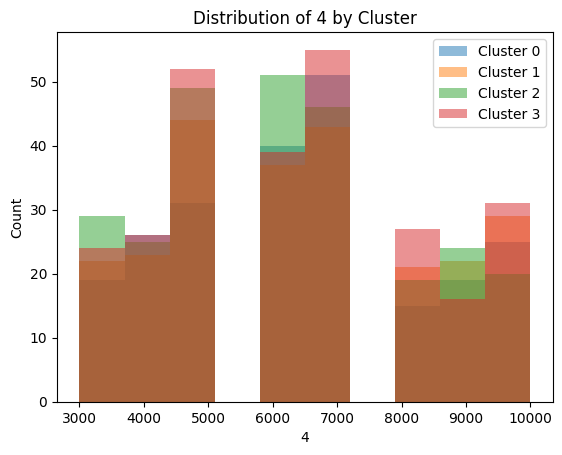

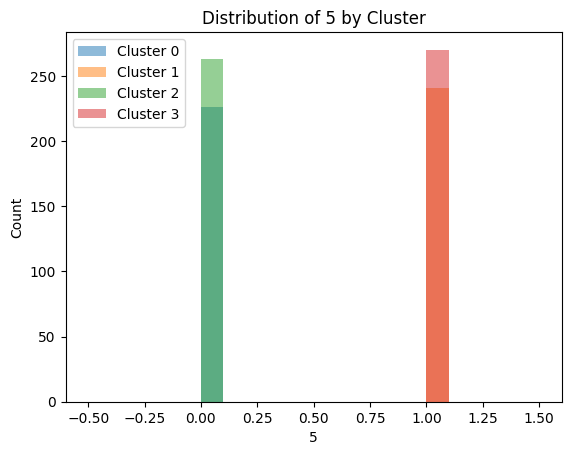

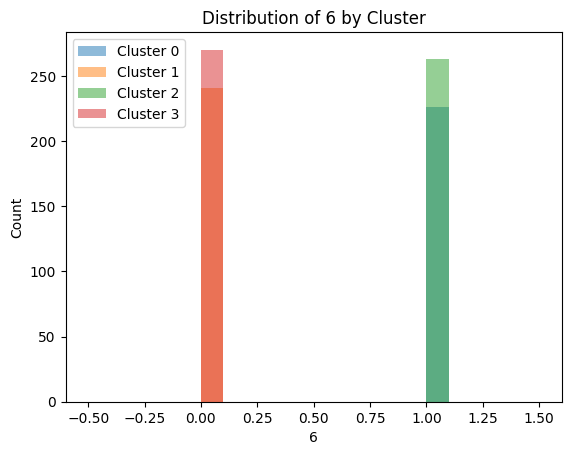

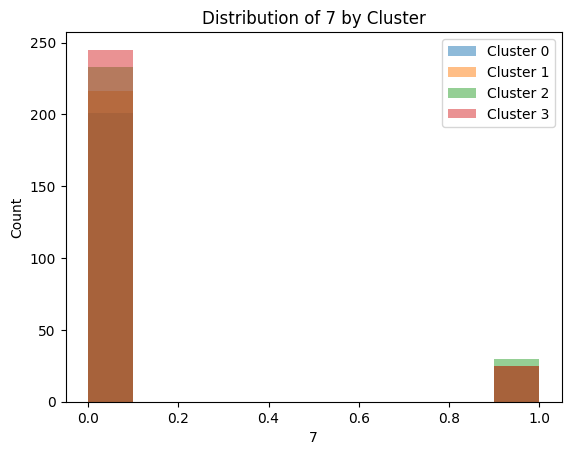

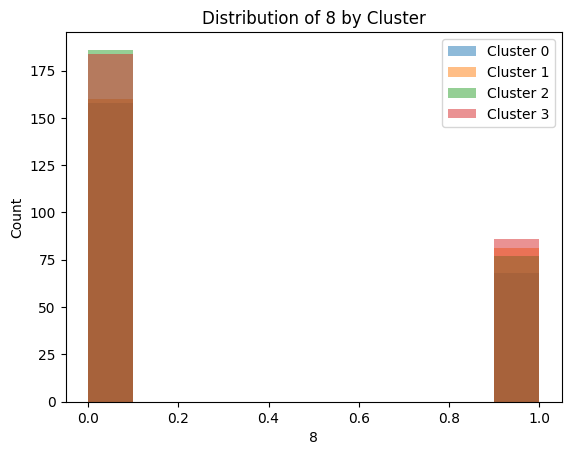

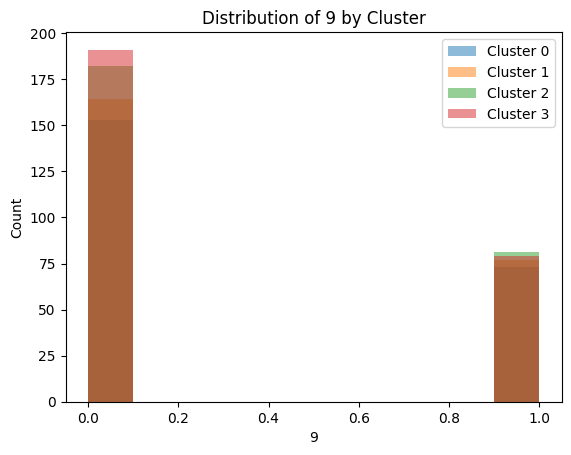

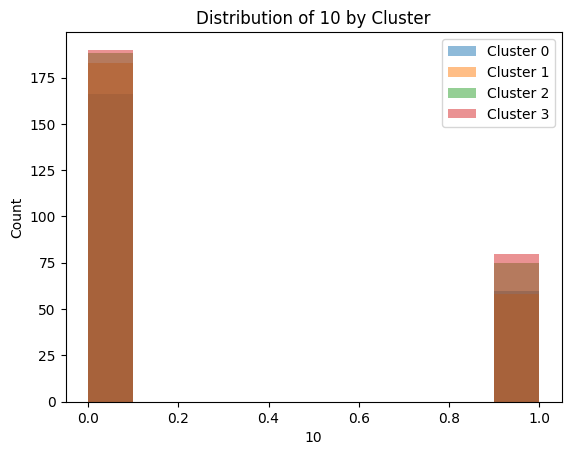

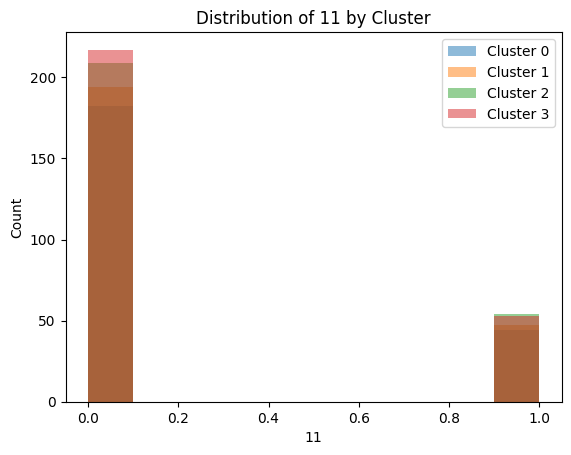

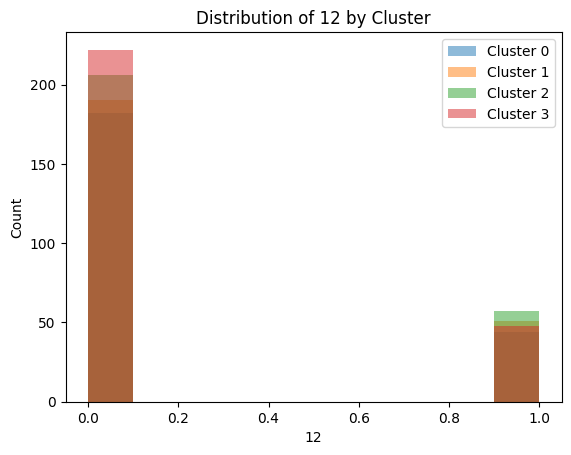

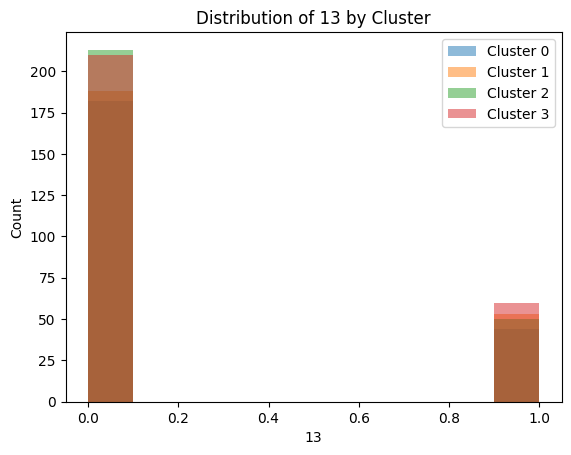

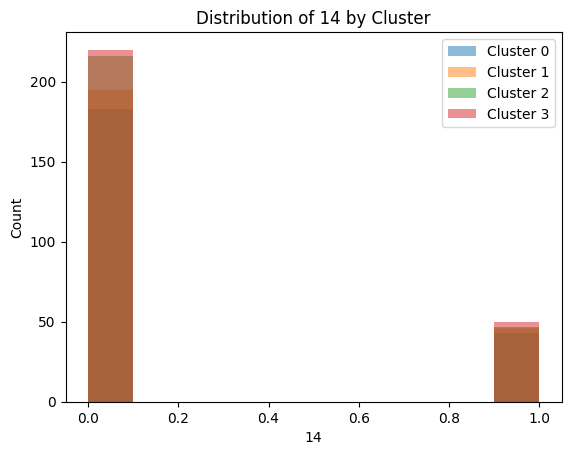

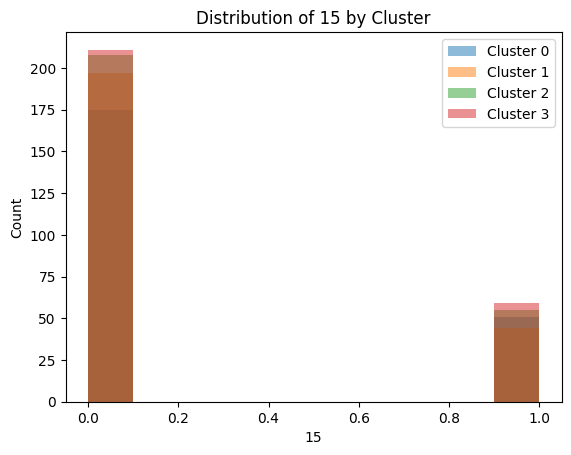

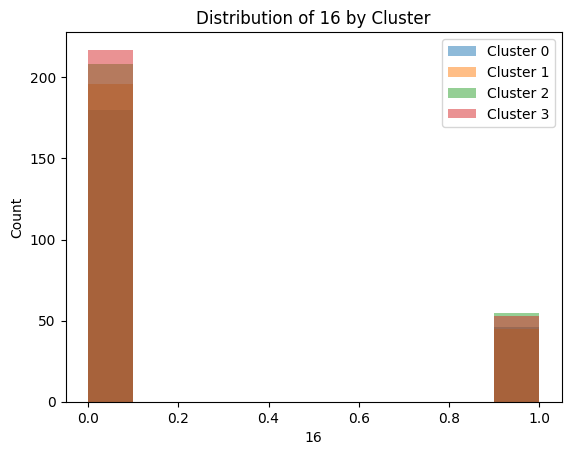

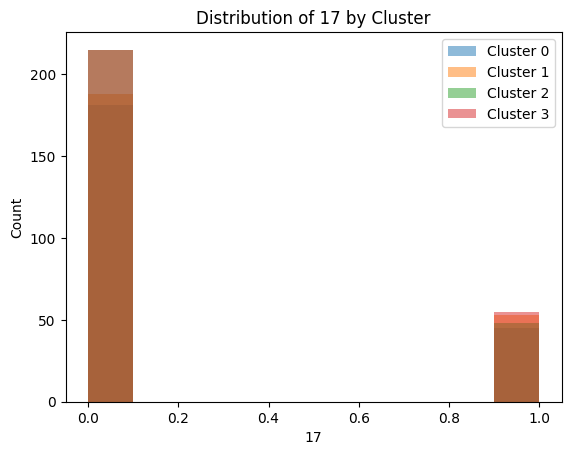

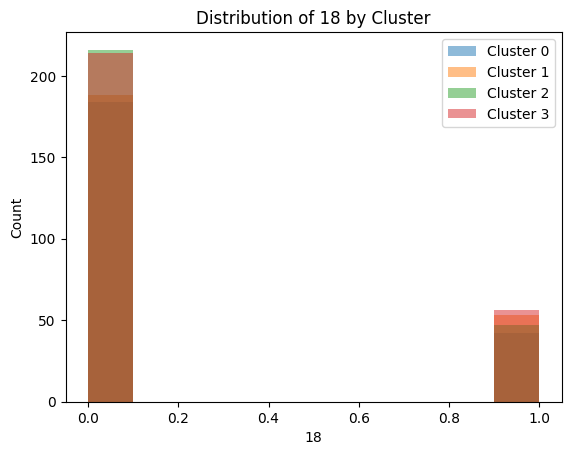

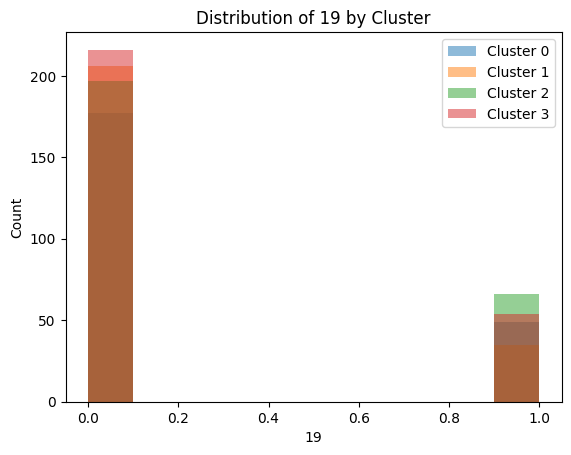

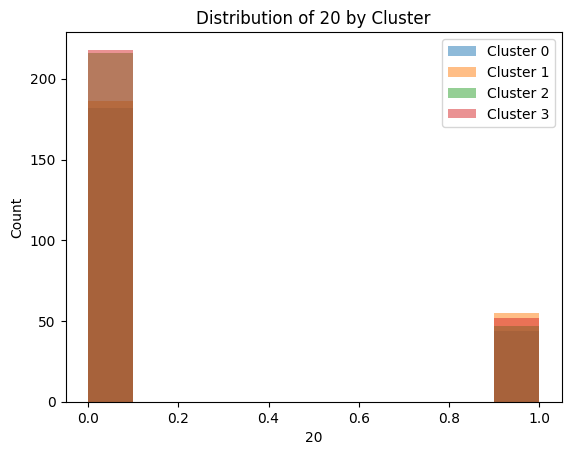

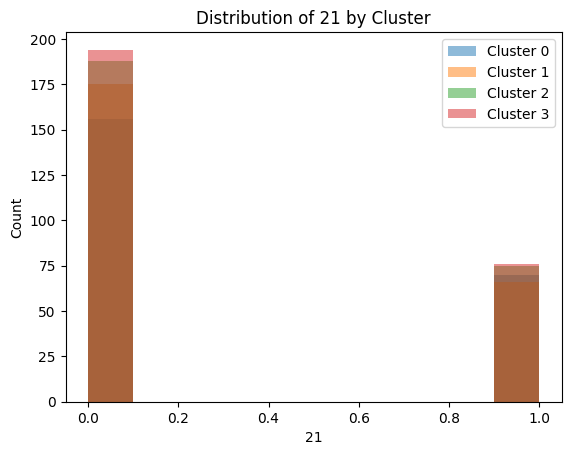

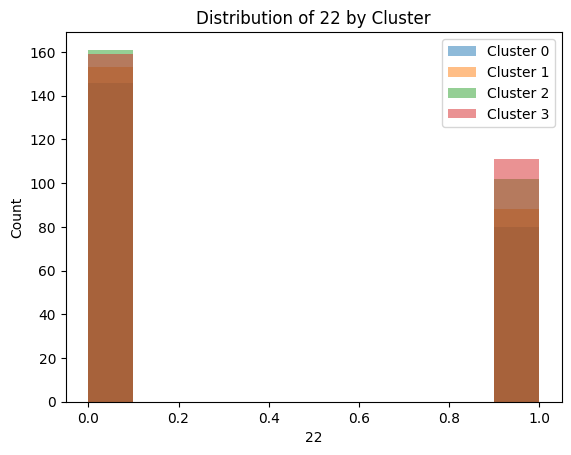

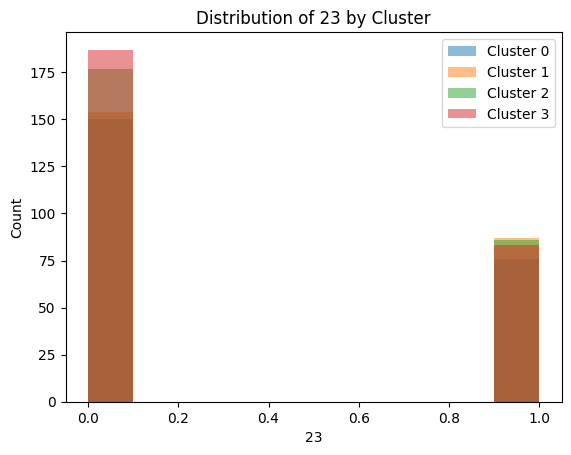

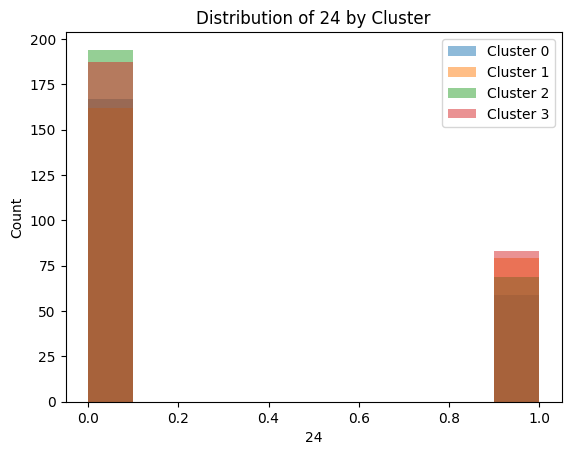

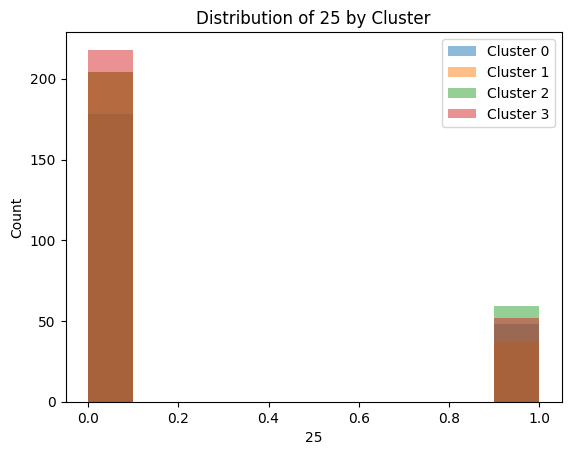

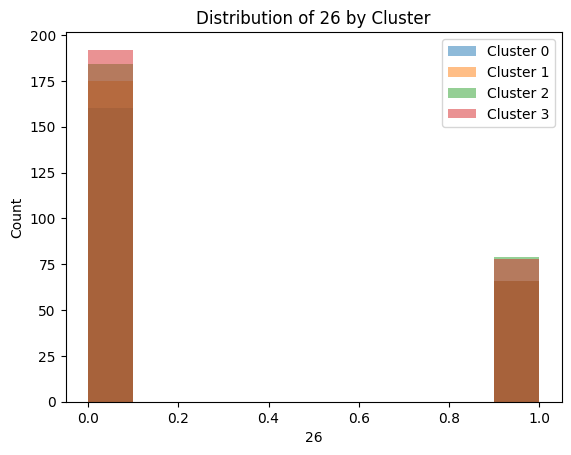

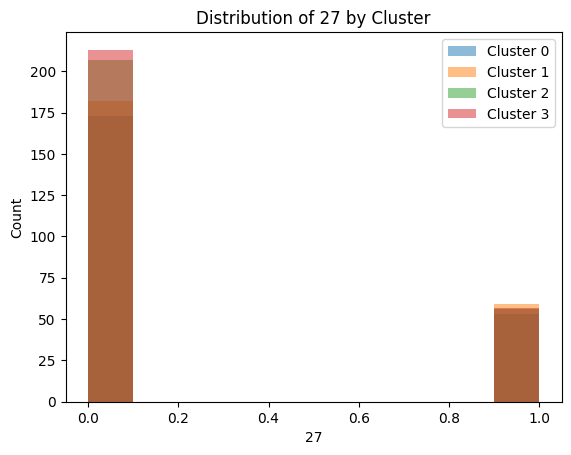

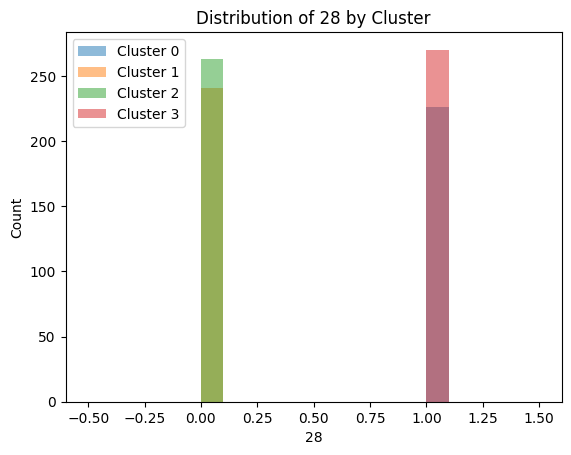

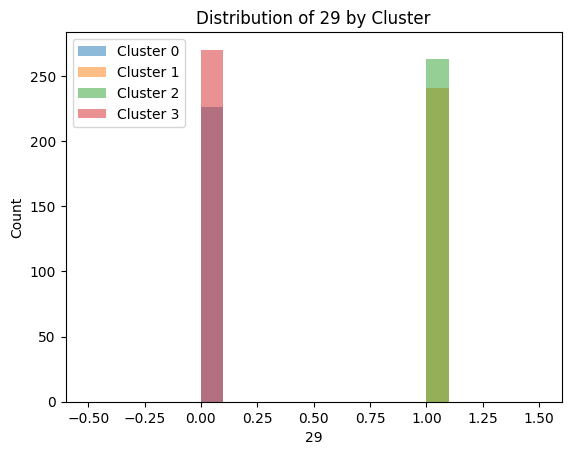

In [25]:
data = dataframe.dropna()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


print(data_scaled)


# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=123)
kmeans.fit(data_scaled)
predictions = kmeans.predict(data_scaled)

# Add cluster predictions to the original data
data["cluster"] = predictions

# Analyze mean values of each variable by cluster
cluster_stats = data.groupby(["cluster"]).mean()
print(cluster_stats)

# Plot distributions of each variable by cluster
for col in data.columns[:-1]:
    plt.figure()
    plt.hist(data[data["cluster"] == 0][col], alpha=0.5, label="Cluster 0")
    plt.hist(data[data["cluster"] == 1][col], alpha=0.5, label="Cluster 1")
    plt.hist(data[data["cluster"] == 2][col], alpha=0.5, label="Cluster 2")
    plt.hist(data[data["cluster"] == 3][col], alpha=0.5, label="Cluster 3")
    plt.legend()
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title("Distribution of {} by Cluster".format(col))

plt.show()


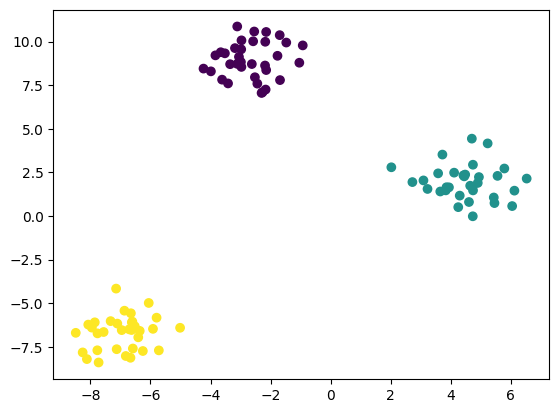

In [24]:
# semi-random data with 3 clear clusters
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()
